In [5]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [22]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [23]:
# Loading the dataset
data = pd.read_csv('diabeties data.csv')  # Replace with the actual file path


In [24]:
# 1. EDA
# Checking for missing values
print("Missing values in each column:\n", data.isnull().sum())


Missing values in each column:
 Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64


In [25]:
# Display basic statistics
print(data.describe())

              BMI       Sleep  SoundSleep  Pregancies
count  948.000000  952.000000  952.000000  910.000000
mean    25.763713    6.949580    5.495798    0.386813
std      5.402595    1.273189    1.865618    0.909455
min     15.000000    4.000000    0.000000    0.000000
25%     22.000000    6.000000    4.000000    0.000000
50%     25.000000    7.000000    6.000000    0.000000
75%     29.000000    8.000000    7.000000    0.000000
max     45.000000   11.000000   11.000000    4.000000


In [26]:
data.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [15]:
print("Column names in the dataset:", data.columns)

Column names in the dataset: Index(['Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
       'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
       'UriationFreq', 'Diabetic', 'Age_49.375', 'Age_54.5'],
      dtype='object')


Categorical columns: Index(['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive',
       'Smoking', 'Alcohol', 'RegularMedicine', 'JunkFood', 'Stress',
       'BPLevel', 'Pdiabetes', 'UriationFreq', 'Diabetic'],
      dtype='object')


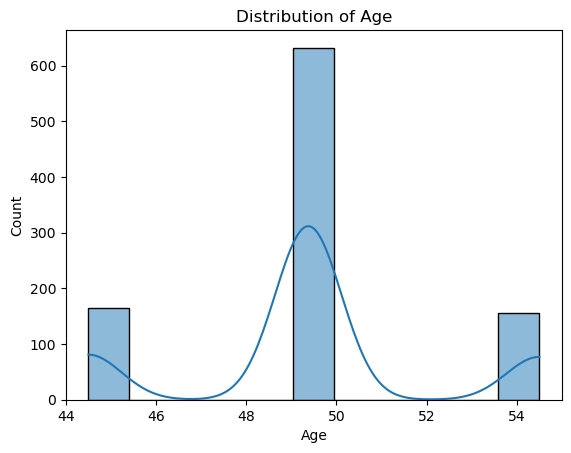

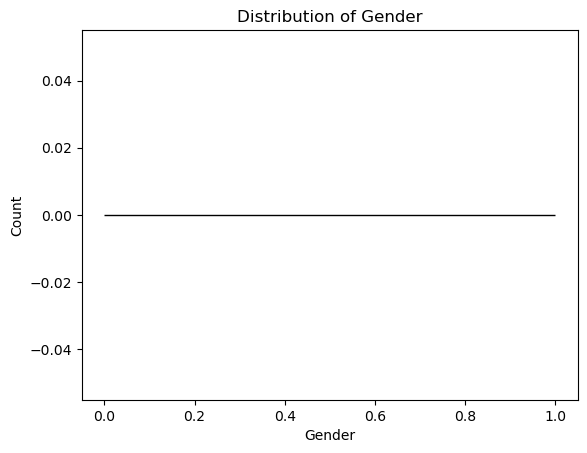

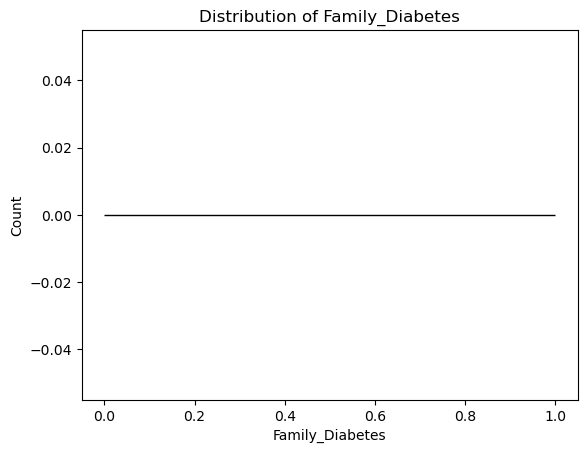

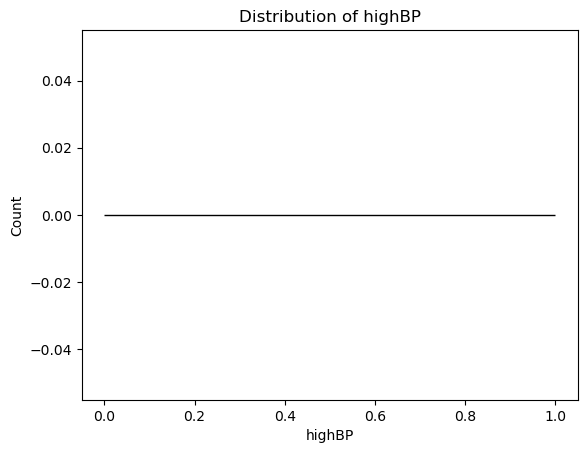

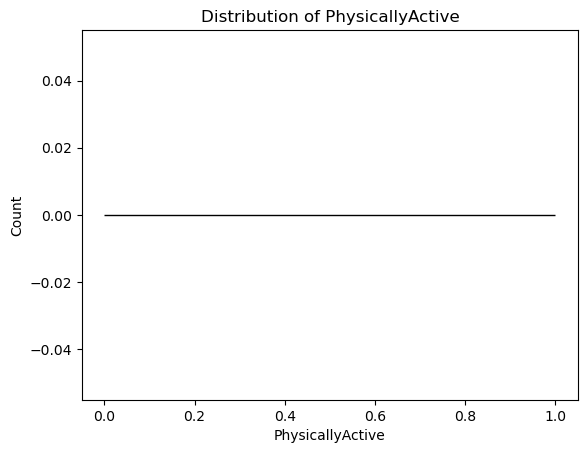

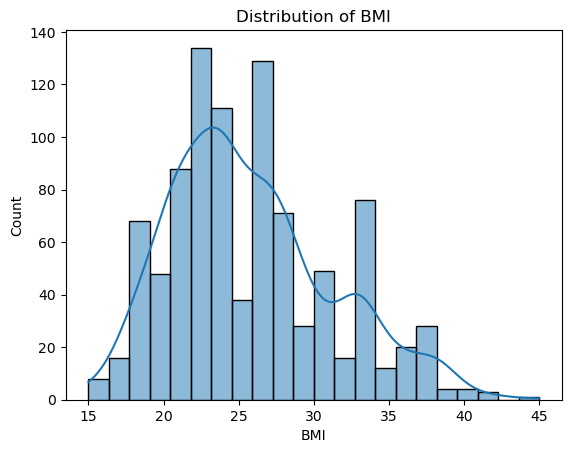

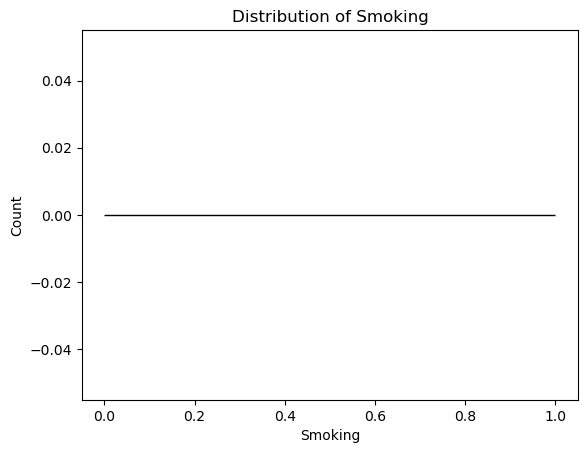

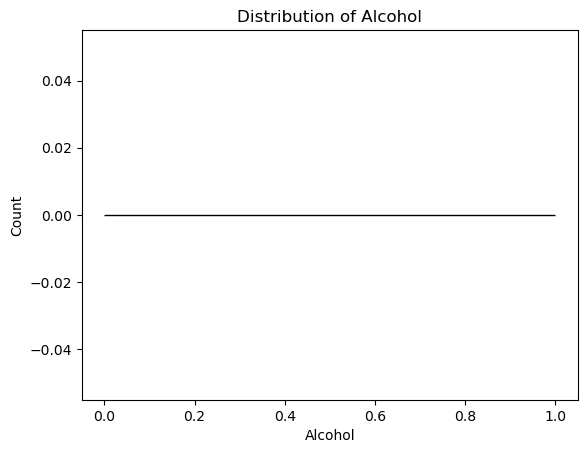

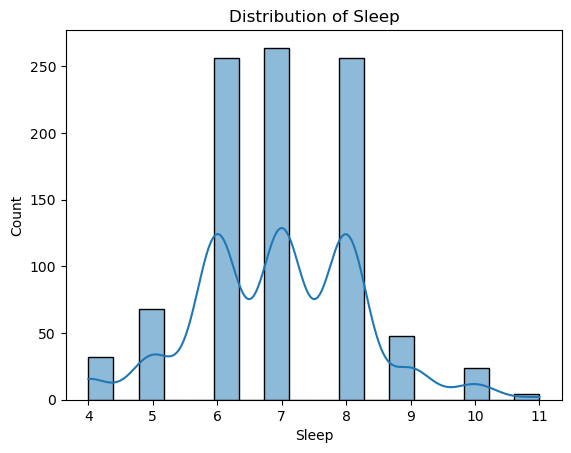

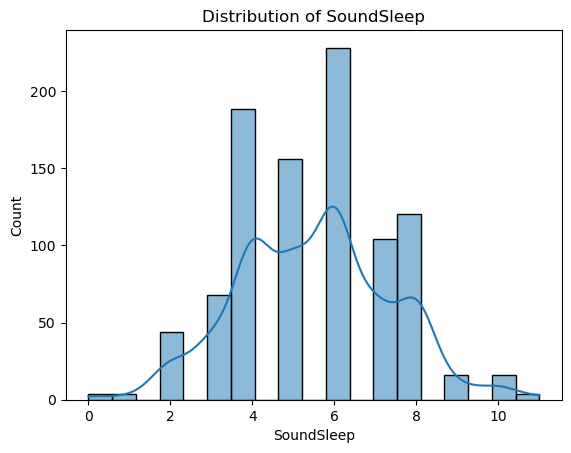

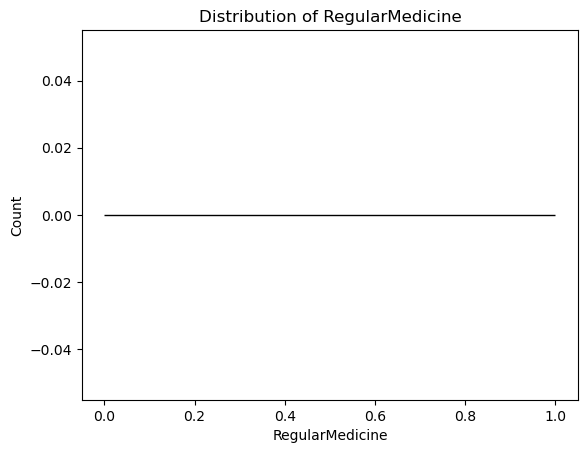

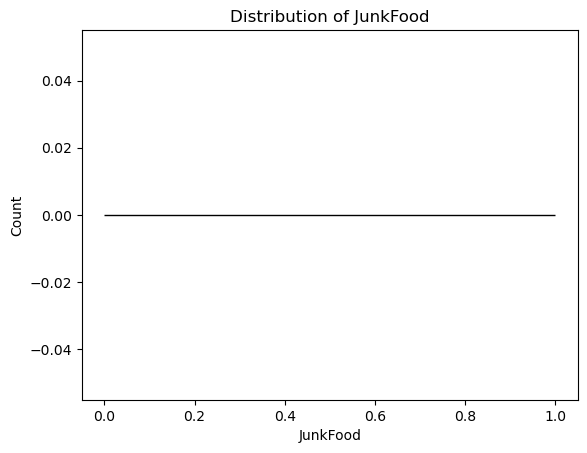

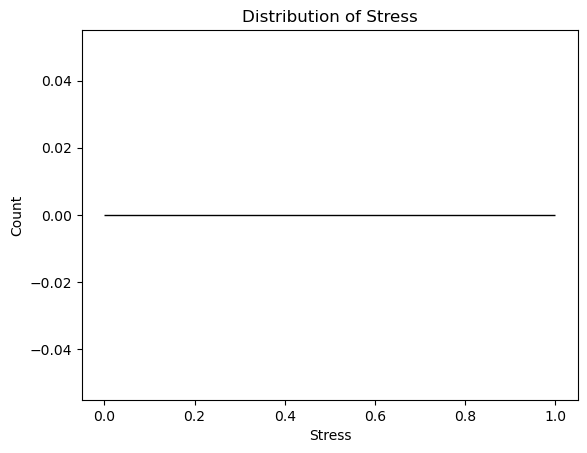

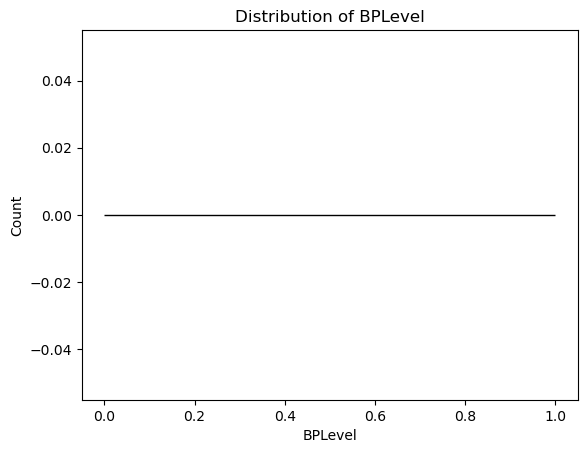

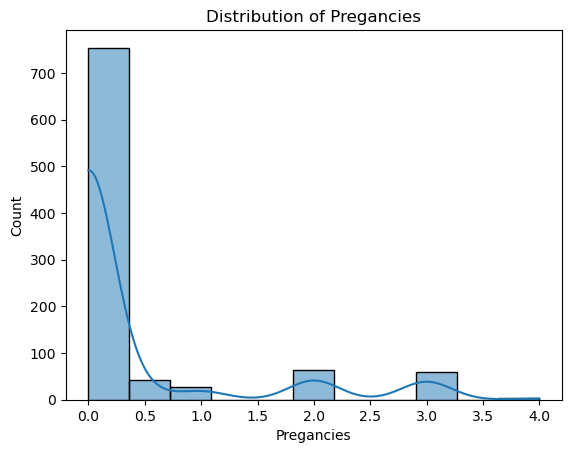

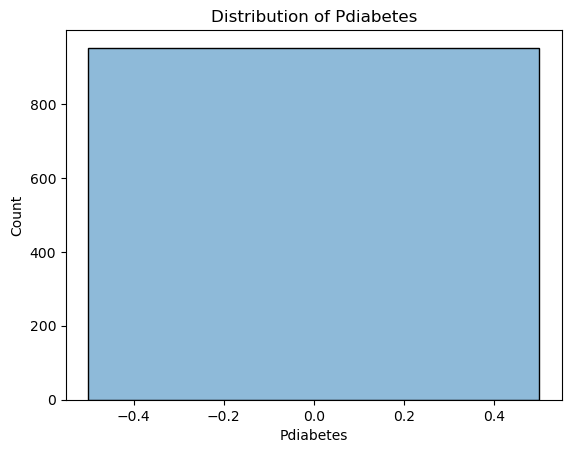

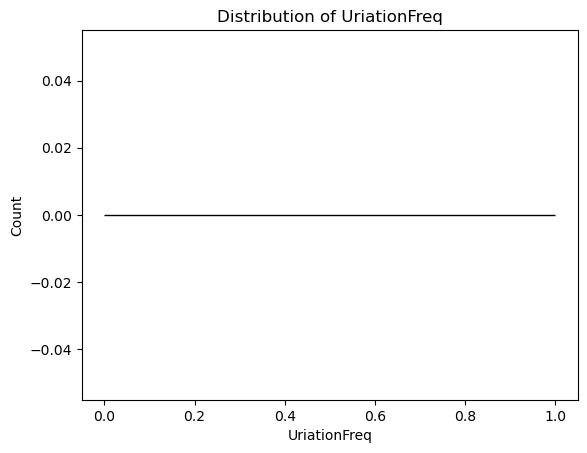

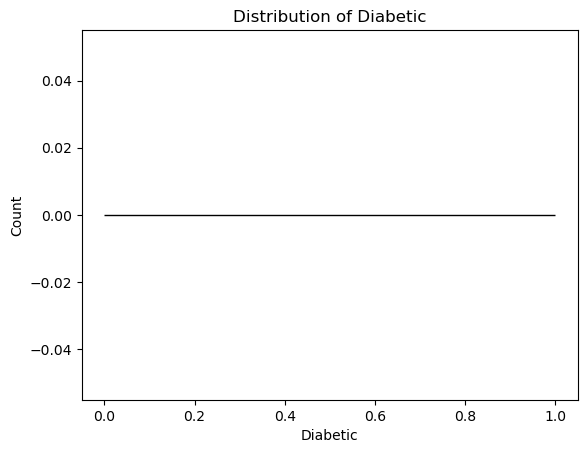

In [28]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

# Convert problematic columns with string values to numeric
for column in categorical_columns:
    # If column contains ranges (e.g., "50-59"), replace with midpoints
    if data[column].str.contains('-').any():
        data[column] = data[column].str.extract(r'(\d+)-(\d+)').astype(float).mean(axis=1)
    # Convert other string columns to numeric where possible
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Fill any remaining NaN values after conversion
data.fillna(data.mean(), inplace=True)

# Visualize distributions of numeric columns
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")

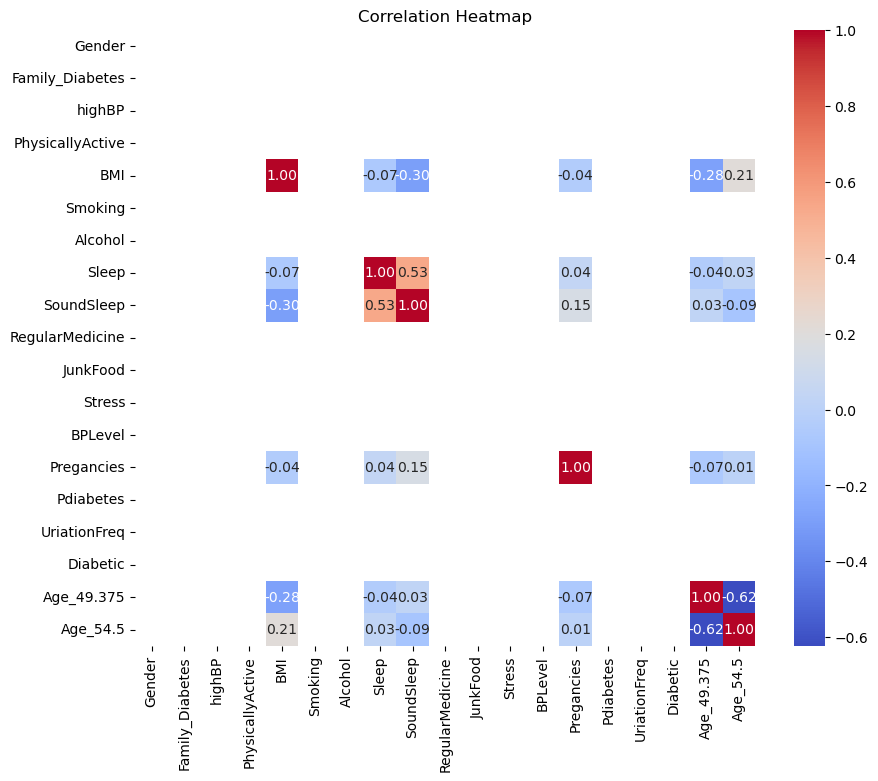

In [21]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [29]:
# 2. Data Preprocessing
# Encode categorical variables (if any remain after conversion)
for column in categorical_columns:
    if data[column].nunique() <= 2:  # Binary categories
        data[column] = data[column].astype('category').cat.codes
    else:  # Non-binary categories
        data = pd.get_dummies(data, columns=[column], drop_first=True)


In [30]:
# Splitting data into features and target
X = data.drop(columns=['Sleep'])  # Replace 'Outcome' with your target column name
y = data['SoundSleep']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [31]:
# 3. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Performance:
Accuracy: 1.0
Confusion Matrix:
 [[ 3  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0]
 [ 0  0  0 49  0  0  0  0  0  0]
 [ 0  0  0  0 52  0  0  0  0  0]
 [ 0  0  0  0  0 62  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  0  4]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        49
           5       1.00      1.00      1.00        52
           6       1.00      1.00      1.00        62
           7       1.00      1.00      1.00        34
           8       1.00      1.00      1.00        39
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00 

In [33]:
# 4. K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluation
print("KNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Performance:
Accuracy: 0.8986013986013986
Confusion Matrix:
 [[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  2  0  0  0  0  0  0  0]
 [ 0  0  0 17  2  3  0  0  0  0  0]
 [ 0  0  0  0 49  0  0  0  0  0  0]
 [ 0  0  0  0  2 48  2  0  0  0  0]
 [ 0  0  0  0  0  0 62  0  0  0  0]
 [ 0  0  0  0  0  0  2 30  2  0  0]
 [ 0  0  0  0  0  0  0  3 36  0  0]
 [ 0  0  0  0  0  0  0  3  5  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         3
           2       1.00      0.83      0.91        12
           3       0.89      0.77      0.83        22
           4       0.92      1.00      0.96        49
           5       0.94      0.92      0.93        52
           6       0.94      1.00      0.97        62
           7       0.83      0.88      0.86        34
           8       0.84    

C:\Users\krishna rohit\desktop\newfolder\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\krishna rohit\desktop\newfolder\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\krishna rohit\desktop\newfolder\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
# Comparing Models
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

Decision Tree Accuracy: 1.0
KNN Accuracy: 0.8986013986013986
